In [6]:
#configuramos importacion desde kaggle
from google.colab import files
!pip install -q kaggle

In [7]:
#subimos kaggle.json con el cliente
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [8]:
!kaggle datasets download -d shivamb/netflix-shows

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 59.8MB/s]


In [9]:
#movemos fichero json a ubicacion correcta
!mv kaggle.json /root/.kaggle/kaggle.json

In [10]:
#volvemos a cargar el dataset
!kaggle datasets download -d shivamb/netflix-shows

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
import zipfile
import os
import pandas as pd

# Paso 1: Ruta al archivo ZIP
zip_file_path = 'netflix-shows.zip'  # Cambia esta ruta si el archivo ZIP está en otra ubicación

# Paso 2: Directorio de destino para la extracción
extract_dir = 'netflix_shows'
os.makedirs(extract_dir, exist_ok=True)

# Paso 3: Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Archivos descomprimidos en: {extract_dir}")


Archivos descomprimidos en: netflix_shows


In [25]:
# Librerias y analisis exploratorio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob #used for sentiment analysis
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

# Paso 4: Ruta al archivo CSV descomprimido (asegúrate de que el nombre del archivo es correcto)
csv_file_path = os.path.join(extract_dir, 'netflix_titles.csv')

# Paso 5: Verificar si el archivo CSV existe
if os.path.exists(csv_file_path):
    # Cargar el DataFrame
    Netflix = pd.read_csv(csv_file_path)
    # Mostrar las primeras filas del DataFrame
    print(Netflix.head())
else:
    print(f"El archivo {csv_file_path} no se encuentra en el directorio especificado.")



  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [26]:
# Mostrar los nombres de las columnas
print("\nNombres de las columnas:")
print(Netflix.columns)


Nombres de las columnas:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [27]:
# Verificar si hay valores nulos
print("\nValores nulos:")
print(Netflix.isnull().sum())


Valores nulos:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [28]:
#Resumen de la base de datos
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [29]:
#Forma de 8807 filas y 12 columnas
Netflix.shape

(8807, 12)

In [30]:
#visualizar los valores Unicos
Netflix.nunique()


show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [31]:
#visualizar los valores duplicados
Netflix.duplicated().sum()

0

**Generamos una Copia de la base de datos para facilitar los trabajos y tener un respaldo. **


In [32]:
#Creacion de Copia
df = Netflix.copy()
#miramos su forma
df.shape

(8807, 12)

In [33]:
#Eliminamos Valores nulos y miramos su forma
df=df.dropna()
df.shape

(5332, 12)

In [34]:
#Mostramos las primeras 3 filas de un DataFrame
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


Notamos que las variables ['date_added'] se puede dividir en Dia, Mes y Año

In [ ]:
df = pd.DataFrame(df)

# Limpiar espacios adicionales al principio y al final de las fechas
df['date_added'] = df['date_added'].str.strip()

# Convertir la columna date_added a tipo datetime, especificando el formato
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

# Dividir la columna date_added en month, day y year
df['month'] = df['date_added'].dt.month_name()  # Obtener el nombre del mes
df['day'] = df['date_added'].dt.day  # Obtener el día
df['year'] = df['date_added'].dt.year  # Obtener el año

# Mostrar el DataFrame resultante con las nuevas columnas
print(df[['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'month', 'day', 'year', 'release_year', 'rating', 'duration', 'listed_in', 'description']])

     show_id     type                          title             director  \
7         s8    Movie                        Sankofa         Haile Gerima   
8         s9  TV Show  The Great British Baking Show      Andy Devonshire   
9        s10    Movie                   The Starling       Theodore Melfi   
12       s13    Movie                   Je Suis Karl  Christian Schwochow   
24       s25    Movie                          Jeans           S. Shankar   
...      ...      ...                            ...                  ...   
8801   s8802    Movie                        Zinzana      Majid Al Ansari   
8802   s8803    Movie                         Zodiac        David Fincher   
8804   s8805    Movie                     Zombieland      Ruben Fleischer   
8805   s8806    Movie                           Zoom         Peter Hewitt   
8806   s8807    Movie                         Zubaan          Mozez Singh   

                                                   cast  \
7     Kofi Ghana

In [ ]:
df = df.drop(['date_added', 'description'], axis=1)
df.head(10)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,month,day,year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,24,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",September,24,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",September,24,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",September,23,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",September,21,2021
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2010,PG-13,103 min,Comedies,September,20,2021
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",September,19,2021
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2013,PG-13,106 min,Thrillers,September,19,2021
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2017,PG-13,96 min,"Action & Adventure, Dramas",September,16,2021
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",September,16,2021


## Visualizacion de los Datos


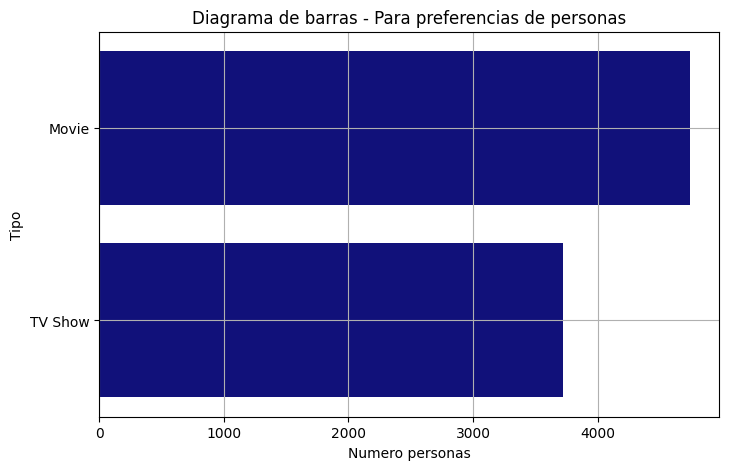

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(df['type'], color='darkblue', errorbar=None)
plt.title('Diagrama de barras - Para preferencias de personas')
plt.xlabel('Numero personas')
plt.ylabel('Tipo')
plt.grid(True)
plt.show()

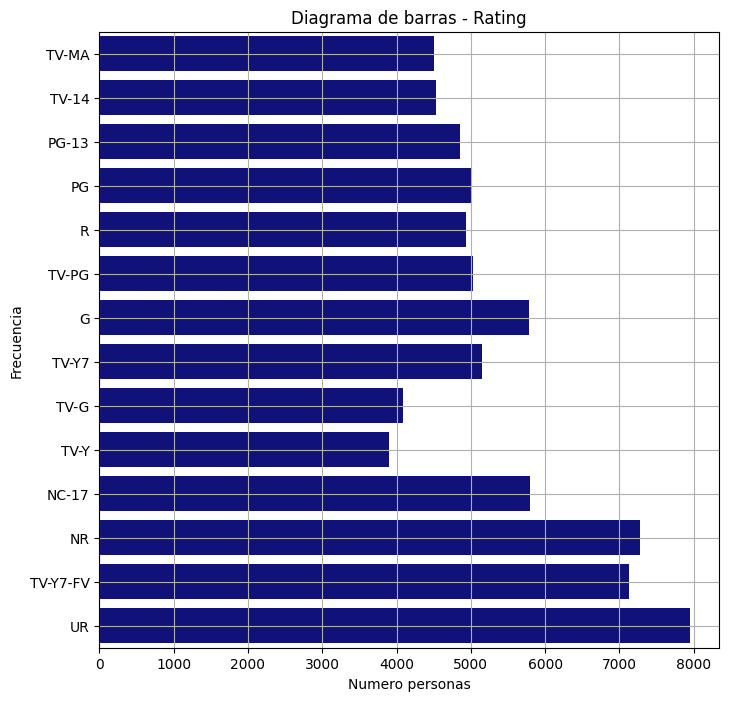

In [ ]:
# Histograma de la distribución según número de hijos
plt.figure(figsize=(8, 8))
sns.barplot(df['rating'], color='darkblue', errorbar=None)
plt.title('Diagrama de barras - Rating')
plt.xlabel('Numero personas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Relación entre tipo y calificación

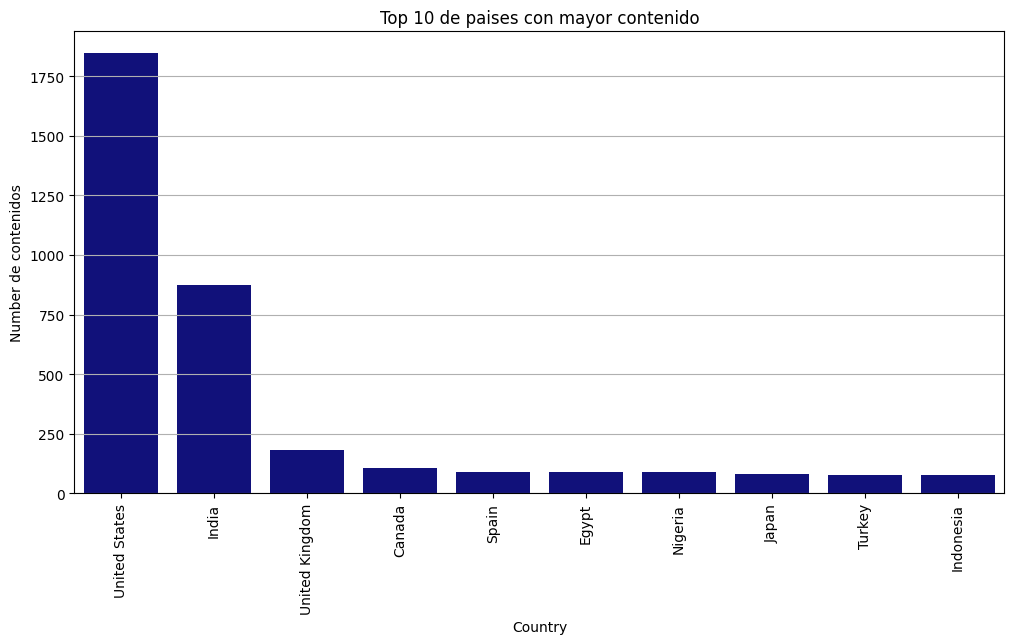

country
United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: count, dtype: int64

In [ ]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, color='darkblue')
plt.title('Top 10 de paises con mayor contenido')
plt.xlabel('Country')
plt.ylabel('Number de contenidos')
plt.grid(True, axis='y')
plt.xticks(rotation=90)
plt.show()


top_countries

In [ ]:
# Distribution de contenido ratings on Netflix
content_type = df.groupby(['type']).size().reset_index(name='counts')
content_type
# Ploting Distribution de contenido ratings on Netflix
fig = px.pie(content_type, names = 'type',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribucion del contenido de Netflix',height =  500 , width = 700)
fig.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Egypt'),
  Text(6, 0, 'Nigeria'),
  Text(7, 0, 'Japan'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Indonesia')])

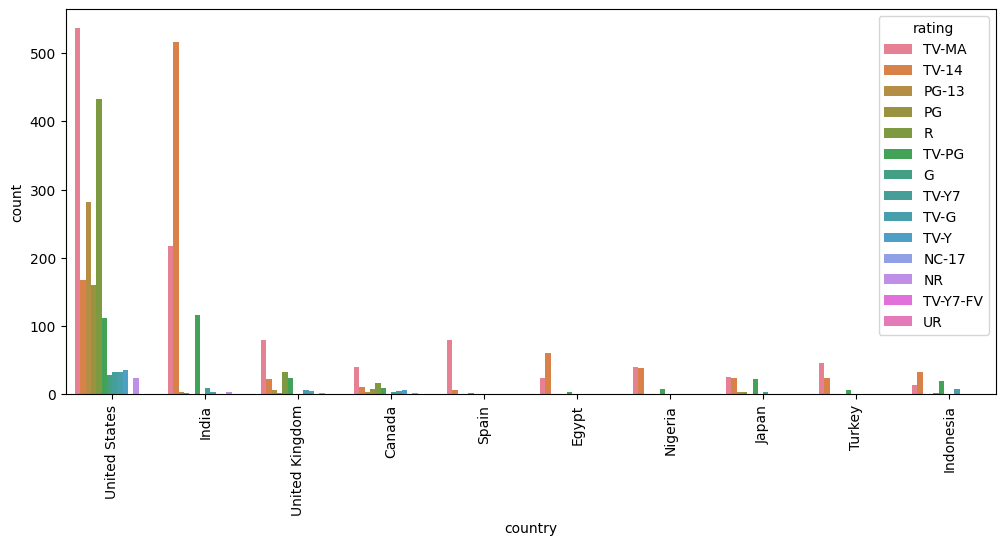

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['country'], order = top_countries.index, hue =df['rating'] )
plt.xticks(rotation=90)

In [ ]:
fig = px.histogram(df, x="rating", color="rating")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [ ]:
# Aquí iría tu dataframe df con los datos

# Obtener los conteos de release_year
release_year_counts = df["release_year"].value_counts().sort_index()

# Crear el gráfico de barras
fig = px.bar(
    x=release_year_counts.index,
    y=release_year_counts.values,
    color=release_year_counts.values,
    color_continuous_scale='Blues',
    labels={'x': 'Release Year', 'y': 'Count'},
    title="Release Years"
)

# Actualizar el layout con título personalizado, etiquetas de los ejes y colores de fondo
fig.update_layout(
    title={
        'text': "Release Years",
        'font': {'color': 'black'}
    },
    xaxis_title={
        'text': "Release Year",
        'font': {'color': 'black'}
    },
    yaxis_title={
        'text': "Count",
        'font': {'color': 'black'}
    },
    plot_bgcolor='white',
    paper_bgcolor='white',
    font_color='black'
)

# Mostrar el gráfico
fig.show()


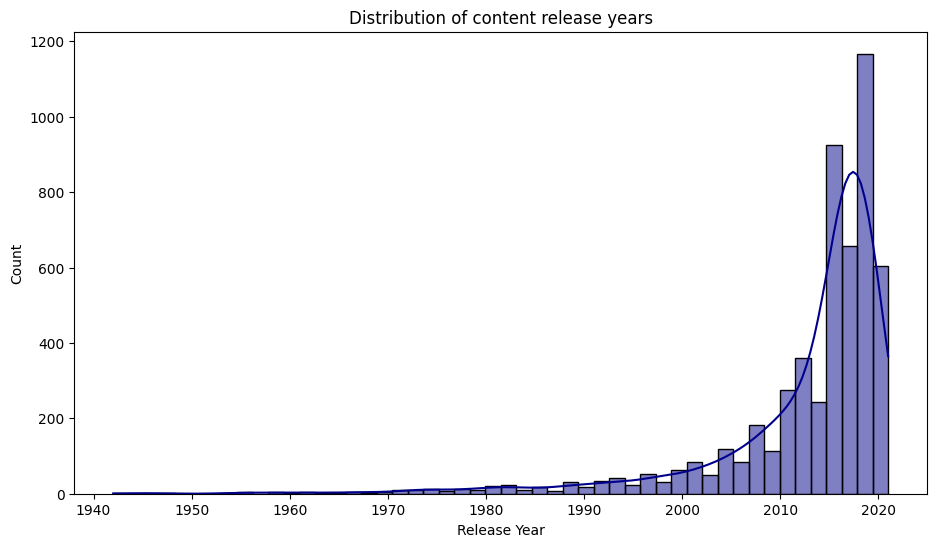

In [ ]:
#Distribution of content release years
plt.figure(figsize=(11, 6))
sns.histplot(df['release_year'], bins=50, kde=True, color='darkblue')
plt.title('Distribution of content release years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.interpolate import make_interp_spline
from scipy.stats import norm
import numpy as np

# Supongamos que ya tienes el DataFrame df con los datos

# Separar los datos en TV Shows y Movies
tv_shows = df[df['type'] == 'TV Show'].copy()
movies = df[df['type'] == 'Movie'].copy()

# Convertir duraciones a numéricas
# Para TV Shows, asumimos que la duración es en temporadas y convertimos a números
tv_shows['duration'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Para Movies, asumimos que la duración es en minutos y ya es numérica
movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)

# Agrupar los datos por duración y contar la cantidad de cada tipo
grouped_tv_shows = tv_shows['duration'].value_counts().reset_index()
grouped_tv_shows.columns = ['duration', 'count']
grouped_tv_shows = grouped_tv_shows.sort_values(by='duration')

grouped_movies = movies['duration'].value_counts().reset_index()
grouped_movies.columns = ['duration', 'count']
grouped_movies = grouped_movies.sort_values(by='duration')

# Función para crear una línea suavizada
def add_smooth_line(fig, x, y, color):
    x_new = np.linspace(min(x), max(x), 300)
    spline = make_interp_spline(x, y, k=3)  # tipo de spline cúbica
    y_smooth = spline(x_new)
    fig.add_trace(go.Scatter(x=x_new, y=y_smooth, mode='lines', line=dict(color=color), name='Smooth Line'))

# Crear el gráfico de barras para TV Shows
fig_tv_shows = px.bar(grouped_tv_shows, x='duration', y='count',
                      title="Duracion de los TV Shows",
                      labels={'duration': "Duracion (Temporadas)", 'count': "Count"},
                      color_discrete_sequence=['darkblue'])

# Añadir línea suavizada para TV Shows
add_smooth_line(fig_tv_shows, grouped_tv_shows['duration'], grouped_tv_shows['count'], 'blue')

# Actualizar el layout del gráfico de TV Shows
fig_tv_shows.update_layout(
     plot_bgcolor='white',
     paper_bgcolor='white',
     font=dict(color='black')
)

# Crear el gráfico de barras para Movies
fig_movies = px.bar(grouped_movies, x='duration', y='count',
                    title="Duracion de peliculas",
                    labels={'duration': "Duracion en (Minutos)", 'count': "Count"},
                    color_discrete_sequence=['darkblue'])



# Actualizar el layout del gráfico de Movies
fig_movies.update_layout(
     plot_bgcolor='white',
     paper_bgcolor='white',
     font=dict(color='black')
)

# Mostrar los gráficos
fig_tv_shows.show()
fig_movies.show()


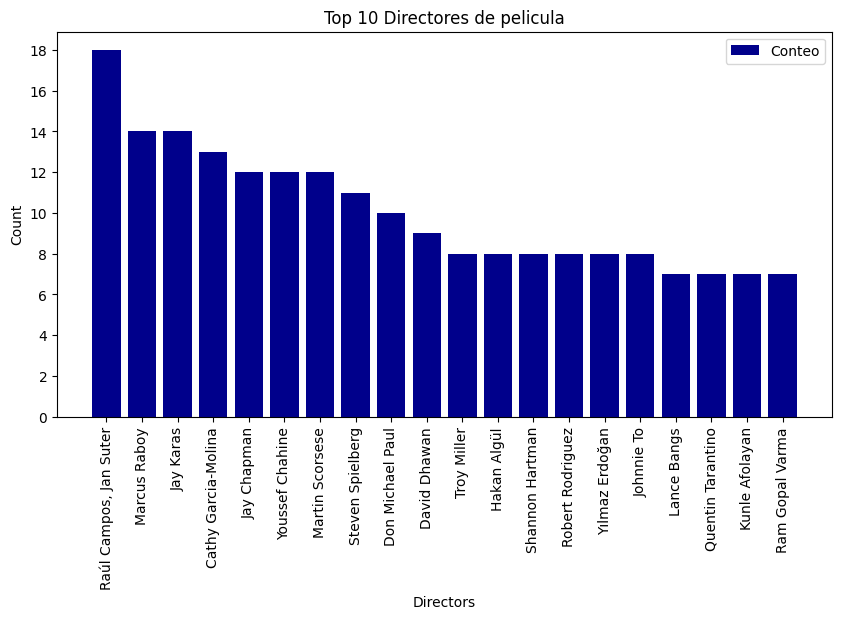

In [ ]:
top_10_directors_movie = df['director'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:20].reset_index()
top_10_directors_movie
plt.figure(figsize=(10,5))
plt.bar(top_10_directors_movie['director'],top_10_directors_movie['count'], color = "darkblue" , label='Conteo')
plt.title('Top 10 Directores de pelicula')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,20,2))
plt.legend()
plt.show()

In [ ]:
from wordcloud import WordCloud

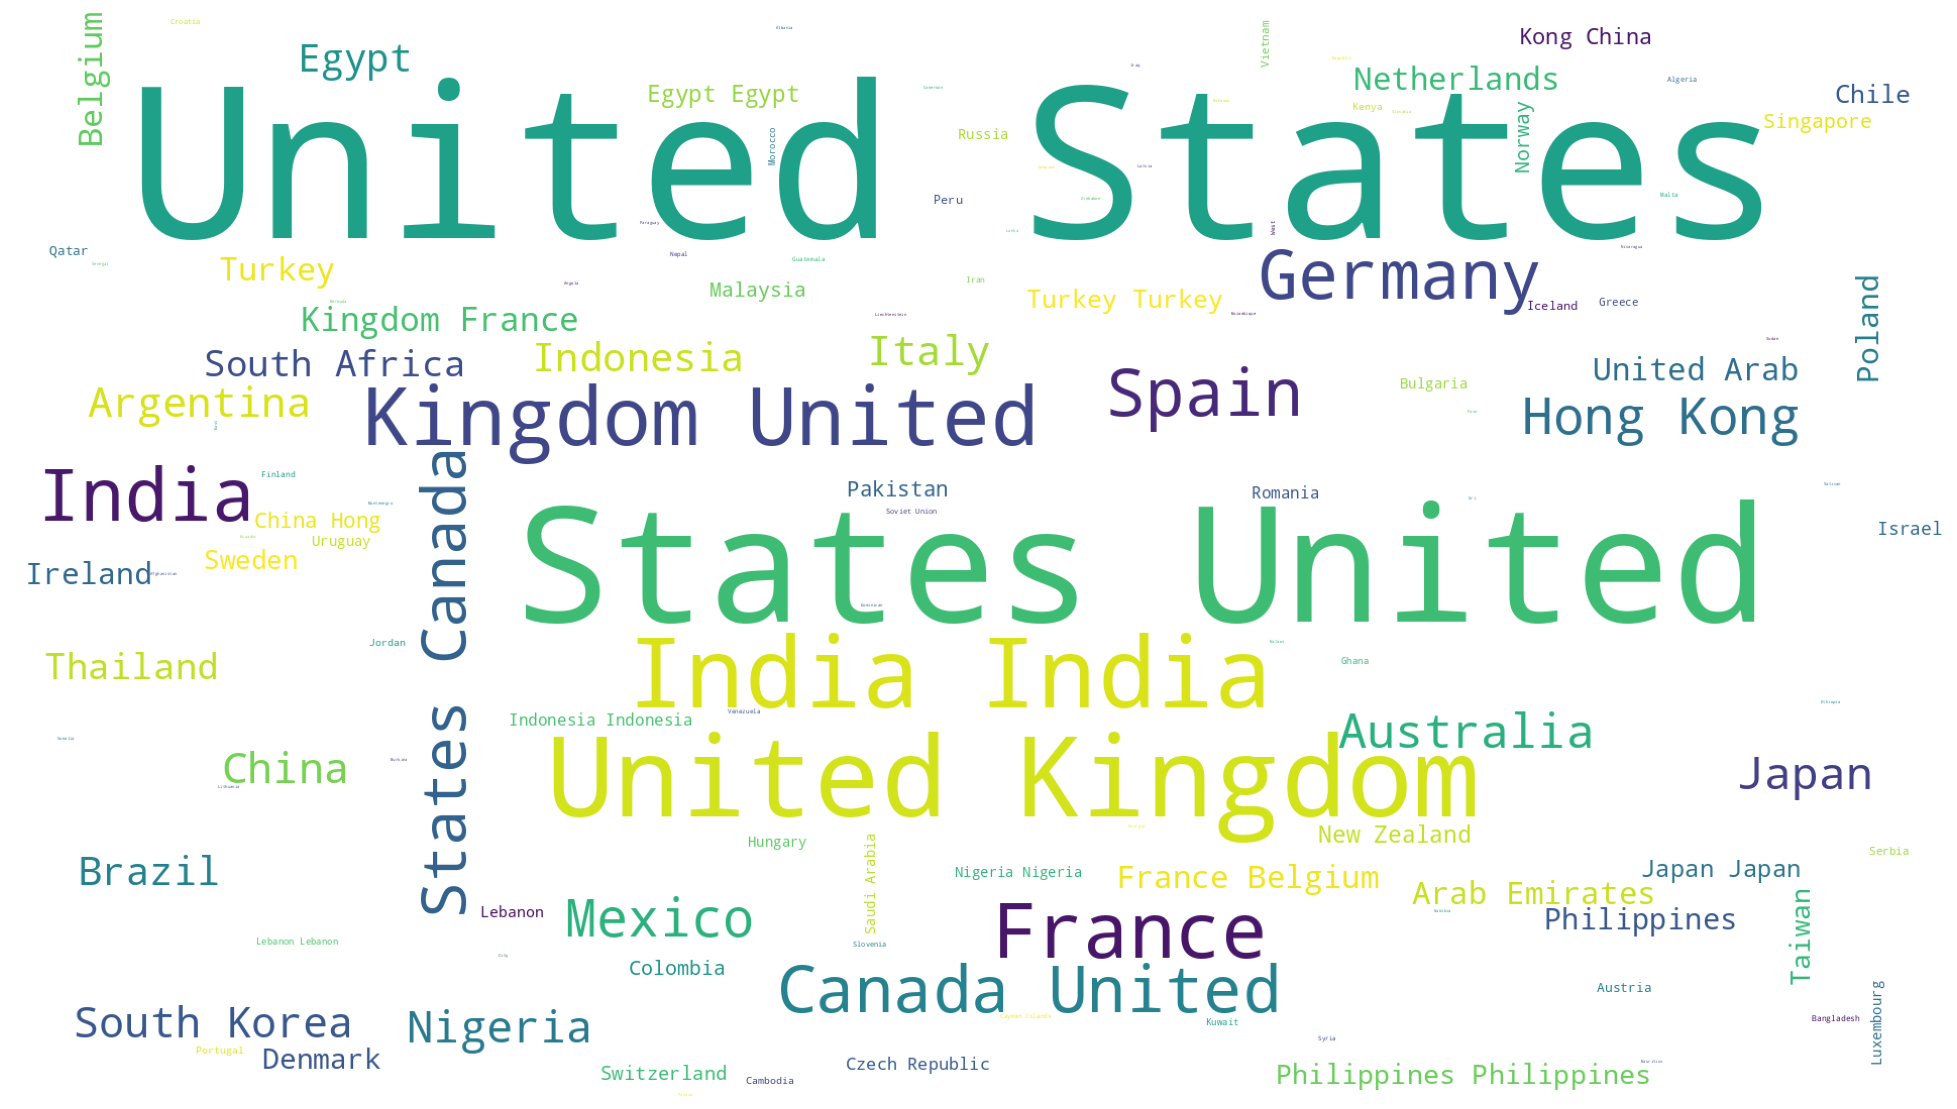

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

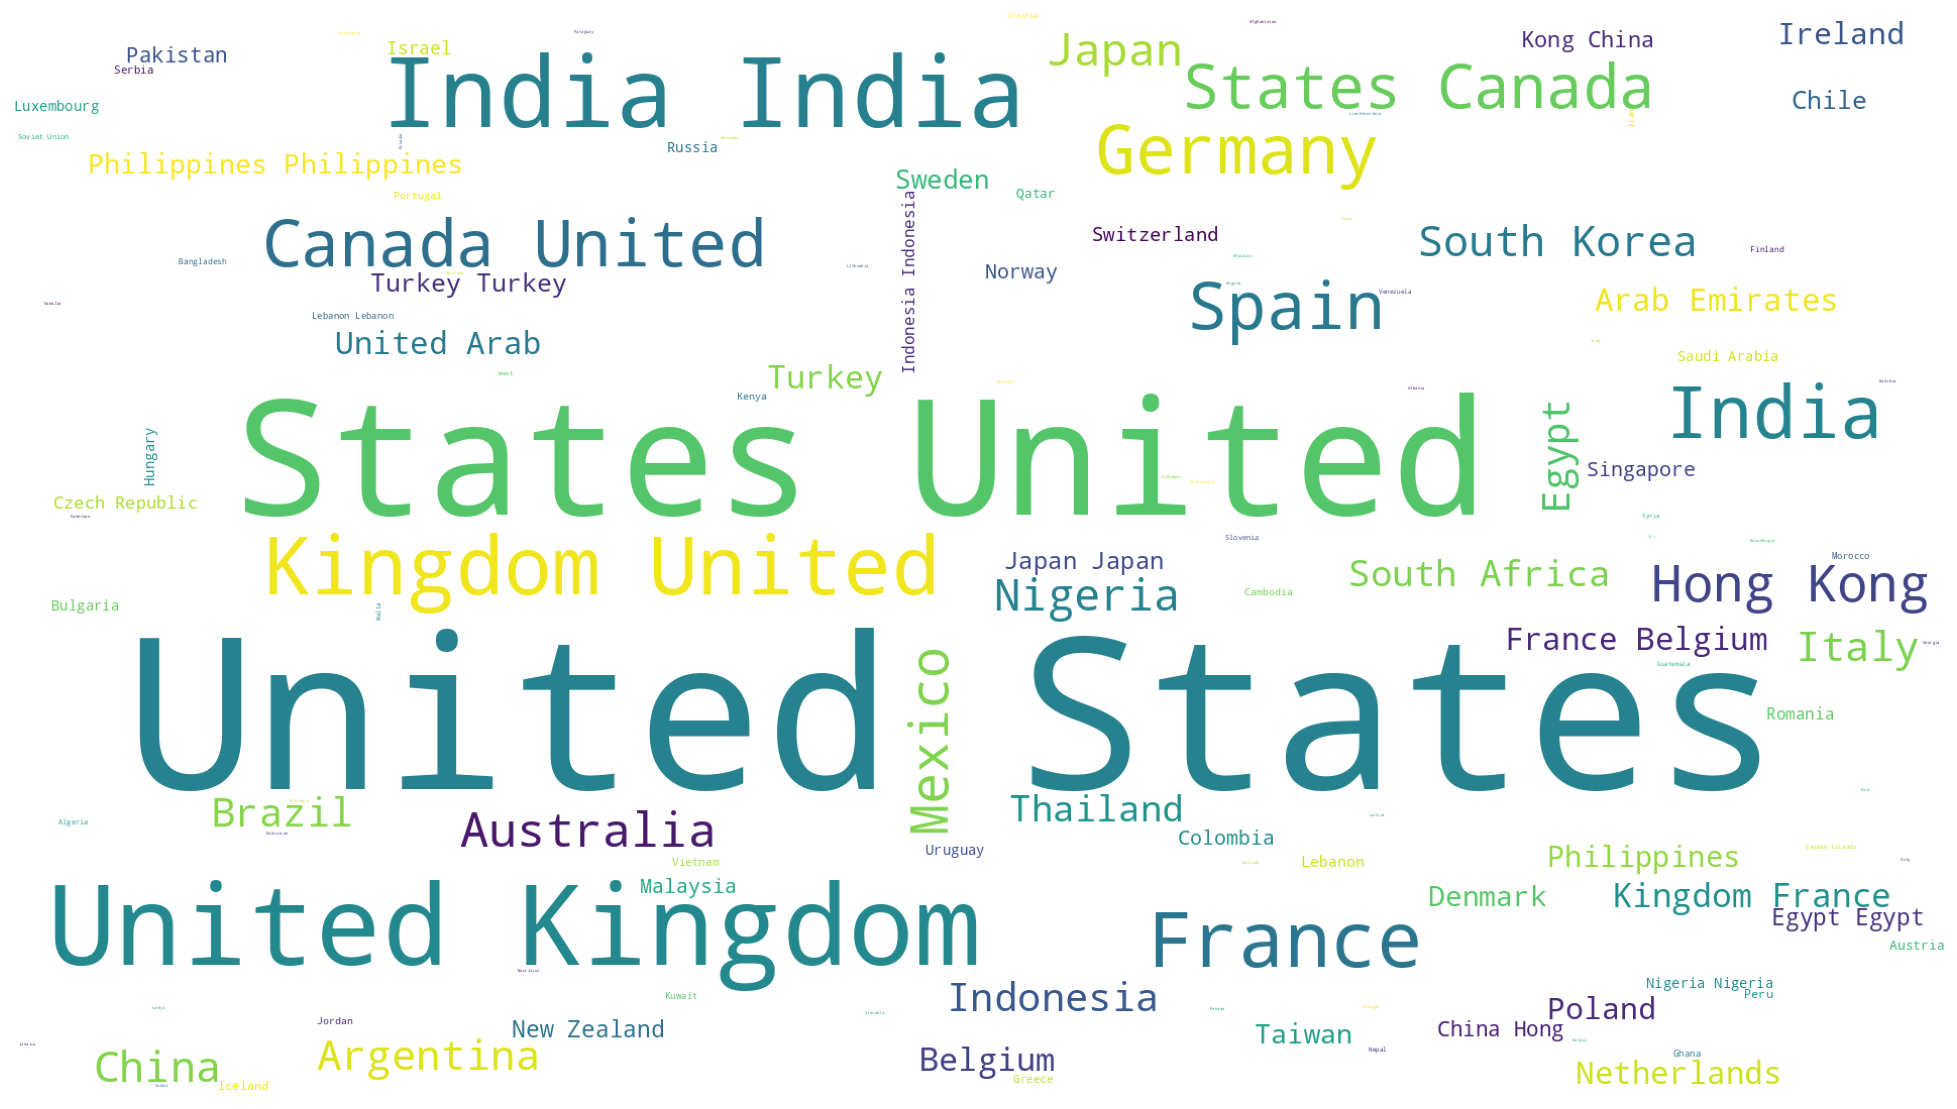

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

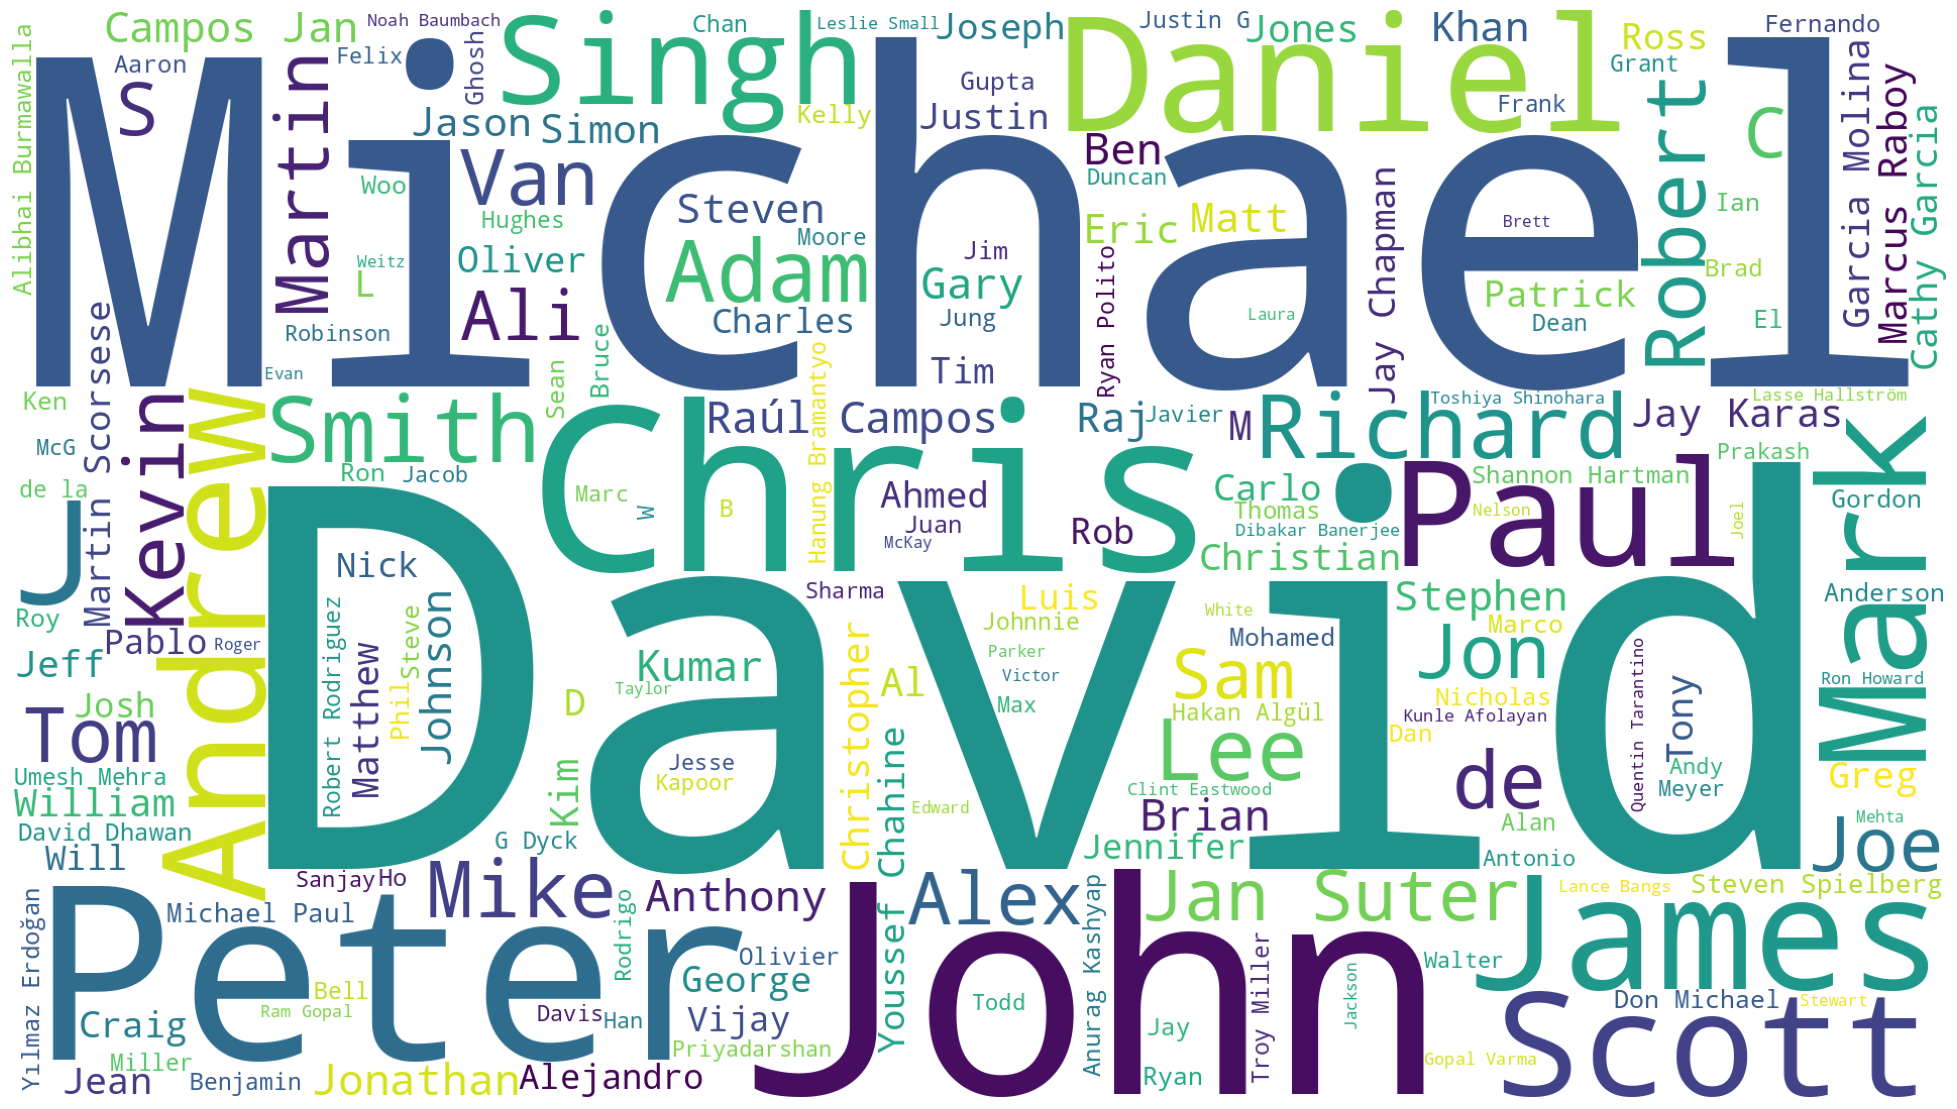

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

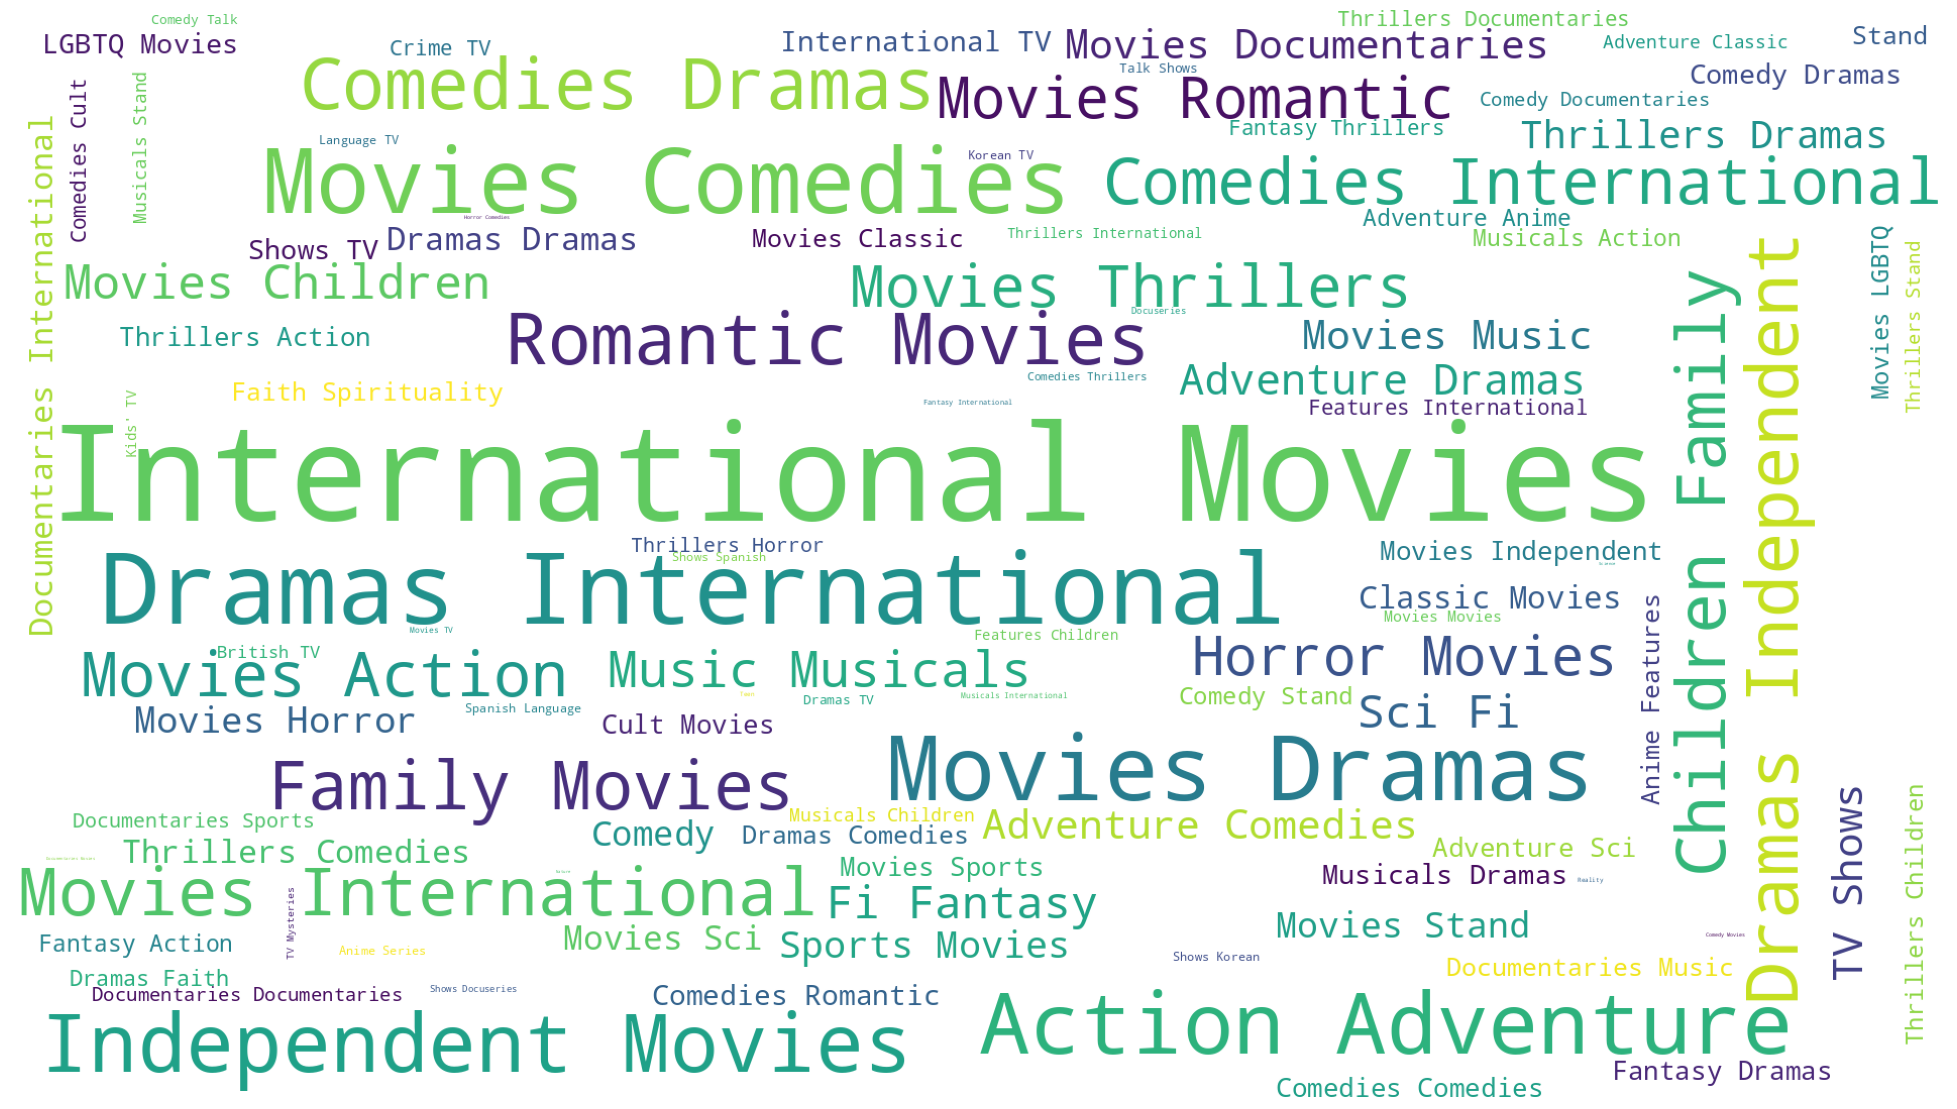

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

**INGENIERÍA DE CARACTERÍSTICAS**

In [ ]:
string_columns = df.select_dtypes(include=('object')).columns
string_columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating',
       'duration', 'listed_in', 'month'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
for col in string_columns:
    df[col] = le.fit_transform(df[col].astype('str'))

In [ ]:
df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,month,day,year
7,4632,0,3686,1309,2721,536,1993,8,27,0,11,24,2021
8,5264,1,4399,256,3253,409,2021,6,187,0,11,24,2021
9,0,0,4733,3619,3259,490,2021,4,5,0,11,24,2021
12,176,0,2155,695,2987,167,2021,8,29,0,11,23,2021
24,963,0,2157,3183,3843,195,1998,6,72,0,11,21,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,5250,0,5305,2201,273,403,2015,8,194,0,7,9,2016
8802,5251,0,5308,857,3135,490,2007,5,64,0,9,20,2019
8804,5252,0,5310,3164,2203,490,2009,5,185,0,9,1,2019
8805,5253,0,5312,2817,4806,490,2006,3,185,0,4,11,2020


In [ ]:
df["duration"].unique()

array([ 27, 187,   5,  29,  72,   4, 195,   7, 194,  26,  17, 196, 189,
        16,  24, 197, 185,   1,   3, 191, 193, 182, 180,  89,  51, 188,
        30,  47,  20,  15,  19,   9,  18,  23,  46,  14,  60,  22, 179,
       192,  10,   2,   6, 183, 113, 171, 186,  11,  62,  13,  31,   8,
         0,  38,  39,  71,  56,  36,  49, 190, 101, 158, 152,  12, 184,
        52,  93,  45,  33, 164, 162,  34,  28,  61,  25, 181, 131,  32,
       172, 169, 141, 167, 173, 165,  35,  44, 178,  41,  53,  55, 111,
        68, 154, 159,  40, 170, 126,  64,  70,  80,  88, 168, 153, 116,
       177,  42,  57, 110,  37, 151, 145, 166,  67, 146, 176, 138, 150,
       121, 160, 143, 174, 119, 147, 140, 137,  78, 134, 120, 144, 163,
       139, 127, 136, 122,  50, 155, 157,  63, 105, 117, 124, 156,  98,
       148, 142,  54,  83, 115,  99, 118,  58, 161,  94,  66, 107,  87,
        48,  81,  77,  96, 108,  92,  90,  79,  91, 175,  97,  82,  76,
       149,  75, 132, 102,  21,  74,  59,  65, 109, 125,  69,  4

In [ ]:
x = df.drop(['type'], axis='columns')
y = df[['type']]

In [ ]:
x

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,month,day,year
7,4632,3686,1309,2721,536,1993,8,27,0,11,24,2021
8,5264,4399,256,3253,409,2021,6,187,0,11,24,2021
9,0,4733,3619,3259,490,2021,4,5,0,11,24,2021
12,176,2155,695,2987,167,2021,8,29,0,11,23,2021
24,963,2157,3183,3843,195,1998,6,72,0,11,21,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,5250,5305,2201,273,403,2015,8,194,0,7,9,2016
8802,5251,5308,857,3135,490,2007,5,64,0,9,20,2019
8804,5252,5310,3164,2203,490,2009,5,185,0,9,1,2019
8805,5253,5312,2817,4806,490,2006,3,185,0,4,11,2020


In [ ]:
y

,type
7,0
8,1
9,0
12,0
24,0
...,...
8801,0
8802,0
8804,0
8805,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.27759864,  0.66299996, -0.62135553, ...,  1.5881349 ,
         1.22154606,  1.41143106],
       [ 1.68819734,  1.12622285, -1.54455752, ...,  1.5881349 ,
         1.22154606,  1.41143106],
       [-1.731726  ,  1.34321647,  1.40390239, ...,  1.5881349 ,
         1.22154606,  1.41143106],
       ...,
       [ 1.68040116,  1.71808269,  1.00498795, ...,  1.01360913,
        -1.09452083,  0.11299241],
       [ 1.68105084,  1.71938205,  0.70076089, ..., -0.42270529,
        -0.08753523,  0.76221173],
       [ 1.68170052,  1.72198078,  0.45527508, ...,  0.43908336,
        -0.99382227,  0.11299241]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
len(X_train)

4265

In [ ]:
len(X_test)

1067

In [ ]:
len(y_train)

4265

In [ ]:
len(y_test)

1067

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(X_train,y_train.values.ravel())
predictions=model_svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"The accuracy of the SVM model on the test set is: {accuracy}")

The accuracy of the SVM model on the test set is: 0.9775070290534208


In [ ]:
from sklearn import tree
model_DecisionTree=tree.DecisionTreeClassifier()
model_DecisionTree.fit(X_train,y_train)
predictions=model_DecisionTree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"The accuracy of the DecisionTreeClassifier model on the test set is: {accuracy}")

The accuracy of the DecisionTreeClassifier model on the test set is: 0.9925023430178069


In [ ]:
from sklearn.naive_bayes import GaussianNB
#Gaussian distribution, bell curve
model_GaussianNB=GaussianNB()
model_GaussianNB.fit(X_train,y_train.values.ravel())
predictions=model_GaussianNB.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"The accuracy of the Naive Bayes model on the test set is:{accuracy}")

The accuracy of the Naive Bayes model on the test set is:0.9728209934395501


In [ ]:
from sklearn.linear_model import LogisticRegression
model_LogisticRegression=LogisticRegression()
model_LogisticRegression.fit(X_train,y_train.values.ravel())
predictions=model_LogisticRegression.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print(f"The accuracy of the LogisticRegression model on the test set is: {accuracy}")

The accuracy of the LogisticRegression model on the test set is: 0.9775070290534208


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100, random_state=0)
model_RF.fit(X_train, y_train.values.ravel())
predictions = model_RF.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"The accuracy of the RandomForestClassifier model on the test set is: {accuracy}")

The accuracy of the RandomForestClassifier model on the test set is: 0.9943767572633552
